# TP histogramme (data)

L'histogramme sert à visualiser le nombre d'occurrences d'une valeur. Il est inclus en standard dans NumPy et MatPlotLib.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]
[0, 5, 2, 1, 3, 5, 0, 3, 0, 5, 0, 0, 0, 0, 0, 0, 5, 4, 5, 4, 4, 4, 0, 3, 2]


(array([10.,  0.,  1.,  0.,  2.,  0.,  3.,  0.,  4.,  5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

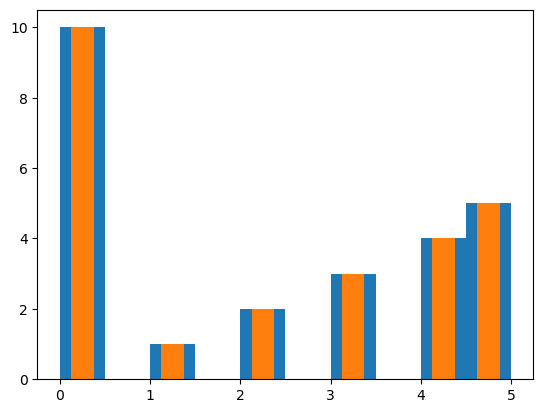

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools, random

# Exemple d'histogramme basique sur une liste de valeurs :
# dix zéros et les chiffres de 1 à 5 répétés autant de fois
# que le chiffre.
data_example = list(itertools.chain(
    *(itertools.repeat(x, 10 if x == 0 else x)
      for x in range(6))
))
print(data_example)
plt.hist(data_example)

# L'histogramme ne dépend pas de l'ordre de la liste puisque
# c'est un compte des éléments.
random.shuffle(data_example)
print(data_example)
plt.hist(data_example, rwidth=0.5) # Le même histogramme, plus fin pour qu'on le voie par-dessus.

On peut régler les intervalles («bins») pour regrouper les données de façon pertinente. À vous de bien choisir. Dans le premier exemple ci-après, avec 5 bins, remarquez que le nombre de 4 et 5 a été cumulé parce qu'on a moins de bins que de valeurs possibles, et que les intervalles par défaut sont un découpage régulier de $[x_{\text{min}}, x_{\text{max}}]$. Les exemples suivants spécifient les bins ou les abscisses pour éviter ce cumul.

(Notez aussi que la fonction `plt.hist` renvoie les valeurs du décompte et des intervalles. Il suffit de l'affecter à la variable anonyme `_` pour ne pas les afficher.)

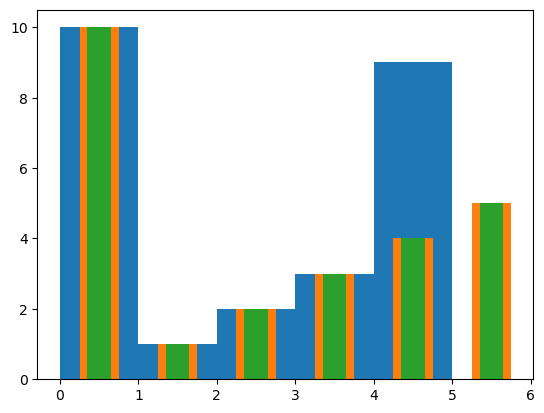

In [22]:
_ = plt.hist(data_example, bins=5)
_ = plt.hist(data_example, bins=range(7), rwidth=0.5)
_ = plt.hist(data_example, range=(0, 6), bins=6, rwidth=0.3)

L'histogramme permet d'estimer une loi de probabilité. Par exemple, dans une série de mesures de photons polarisés, comptons les angles pour lesquels un photon est détecté selon X.

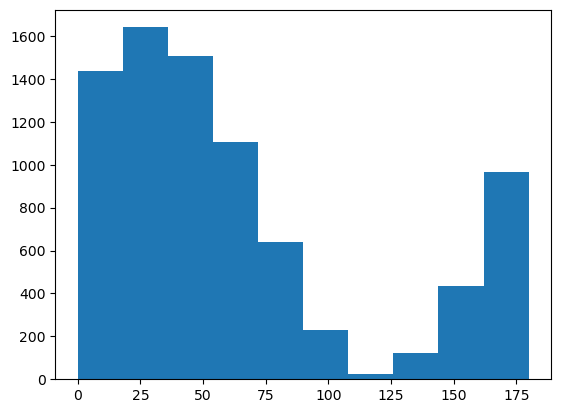

In [23]:
data = pd.read_csv('datasets/jour1-1-facile/1photon-polar-30-alea.csv', sep=';')
assert all(data.columns == ['alpha', 'X', 'Y']), 'Vérifier les noms des colonnes.'
obs = data.alpha[data.X == 1] # Observations : alpha tels que X == 1 (photon détecté).
_ = plt.hist(obs)               # L'histogramme compte les observations.

On peut affiner les intervalles, mais on aura aussi plus de bruit. Essayez 12, 36, 180 bins...

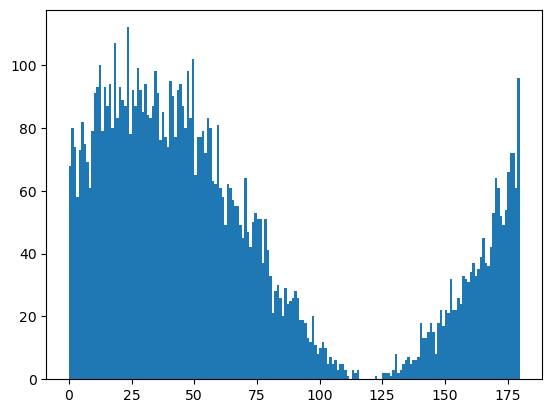

In [24]:
_ = plt.hist(obs, bins=180)

Il pourra arriver que les angles ne soient pas aléatoires. À vous de choisir les bins de façon à afficher un histogramme pertinent.

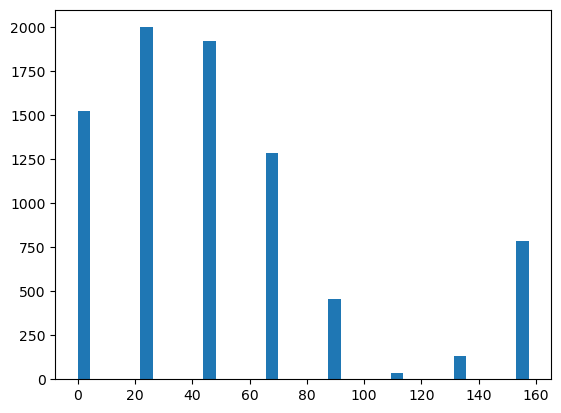

In [21]:
data_intervalles = pd.read_csv('datasets/jour1-1-facile/1photon-polar-30-intervalles.csv', sep=';')
assert all(data_intervalles.columns == ['alpha', 'X', 'Y']), 'Vérifier les noms des colonnes.'
_ = plt.hist(data_intervalles.alpha[data_intervalles.X == 1], bins=36)